# Support Vector Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Data
X = dataset.iloc[:,[1]].values
y = dataset.iloc[:,[-1]].values

## Feature Scalling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fit the SVR

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
# Predict a values
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([ 170370.0204065])

## Visualization

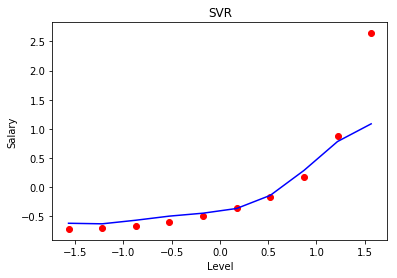

In [7]:
# SVR
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR')

plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()

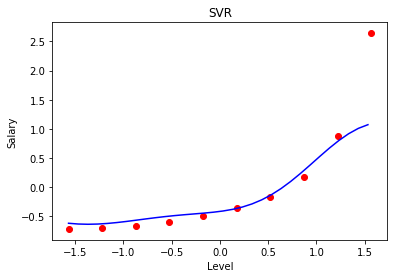

In [8]:
# SVR Continuous curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')

plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()